In [365]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

In [366]:
def cplx2db(number):
    return 20*np.log10(np.abs(number))

def lowpass_design(freq: float, q: float) -> tuple:
    tau = np.tan(freq/2)
    bz, az = np.zeros(3), np.zeros(3)
    bz[0] = tau**2
    bz[1] = 2*tau**2
    bz[2] = tau**2
    az[0] = 1 + (tau/q) + tau**2
    az[1] = 2*tau**2 - 2
    az[2] = 1 - (tau/q) + tau**2
    bz = bz/az[0]
    az = az/az[0]
    return bz, az

def highpass_design(freq: float, q: float) -> tuple:
    tau = np.tan(freq/2)
    bz, az = np.zeros(3), np.zeros(3)
    bz[0] = 1
    bz[1] = -2
    bz[2] = 1
    az[0] = 1 + (tau/q) + tau**2
    az[1] = 2*tau**2 - 2
    az[2] = 1 - (tau/q) + tau**2
    bz = bz/az[0]
    az = az/az[0]
    return bz, az

def notch_design(freq: float, q: float) -> tuple:
    tau = np.tan(freq/2)
    bz, az = np.zeros(3), np.zeros(3)

    az[0] = 1 + 2*(tau/q) + tau**2
    az[1] = 2*tau**2 - 2
    az[2] = 1 - 2*(tau/q) + tau**2
    bz = bz/az[0]
    az = az/az[0]
    return bz, az

def bp_design(freq: float, q: float) -> tuple:
    tau = np.tan(freq/2)
    bz, az = np.zeros(3), np.zeros(3)

    az[0] = 1 + 2*(tau/q) + tau**2
    az[1] = 2*tau**2 - 2
    az[2] = 1 - 2*(tau/q) + tau**2
    bz = bz/az[0]
    az = az/az[0]
    return bz, az

def pole_zero_plot(b, a):
    _, ax = plt.subplots()
    zeros = np.roots(b)
    poles = np.roots(a)
    print(f'{zeros=}')
    print(f'{poles=}')
    ax.scatter(np.real(zeros), np.imag(zeros), marker='o')
    ax.scatter(np.real(poles), np.imag(poles), marker='x')
    ax.grid()
    circle = plt.Circle((0, 0), 1, fill=False)
    ax.add_patch(circle)
    ax.set_aspect('equal')
    return ax

/var/folders/sw/rz0jg8js36v4pvgflq9pj_800000gn/T/ipykernel_22992/2811720124.py:2: RuntimeWarning: divide by zero encountered in log10
  return 20*np.log10(np.abs(number))


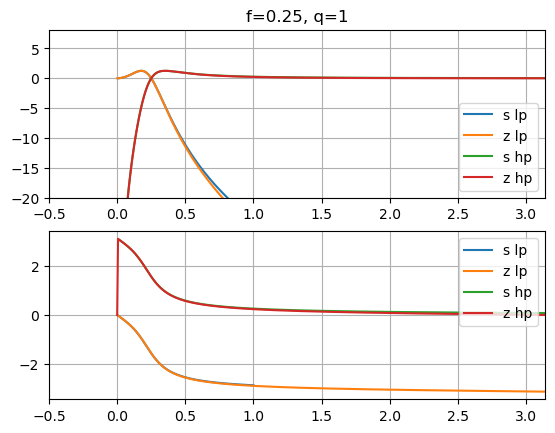

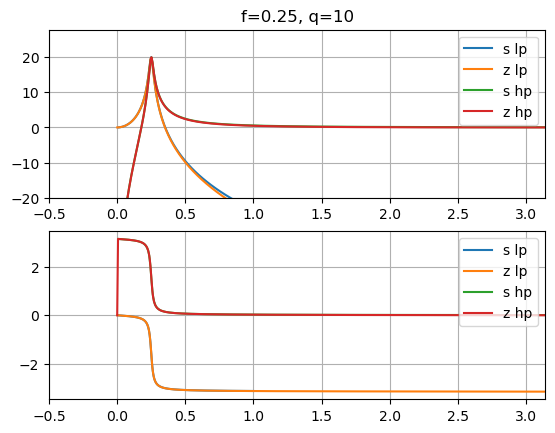

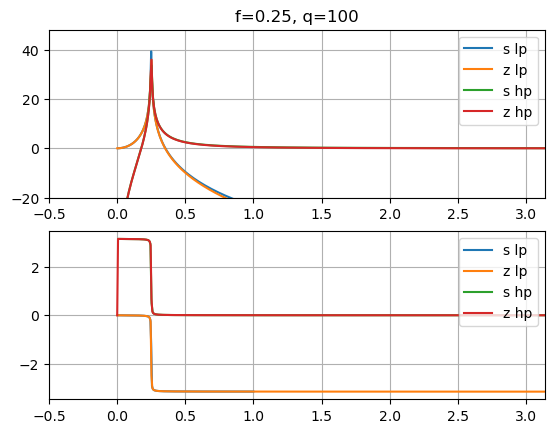

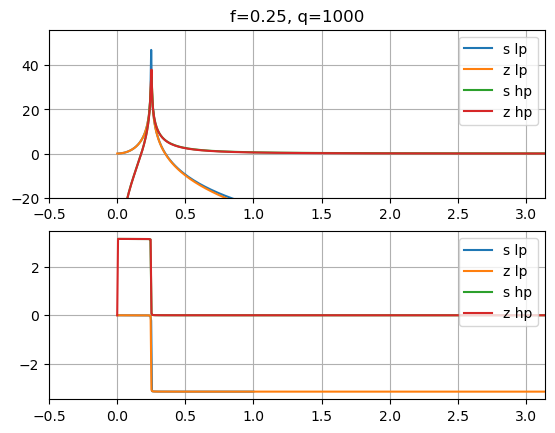

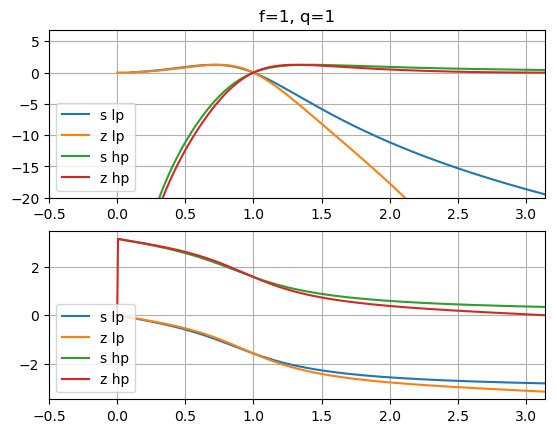

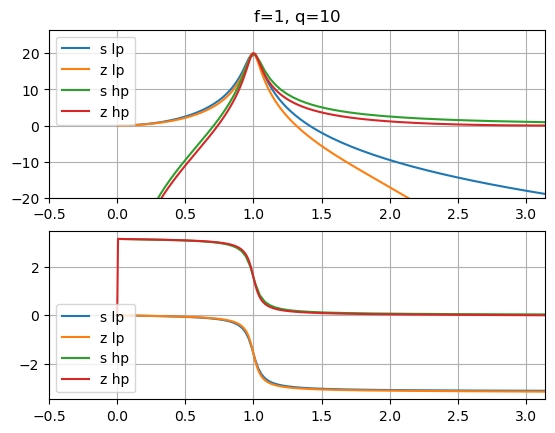

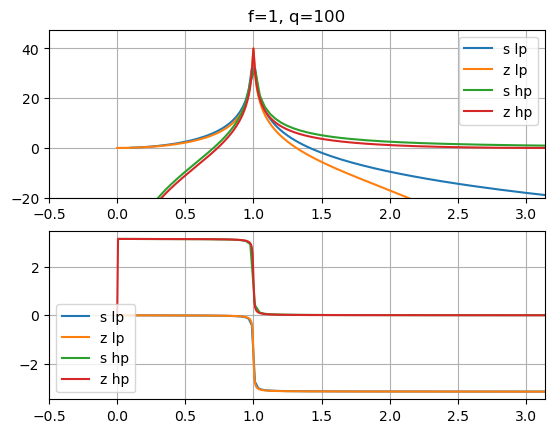

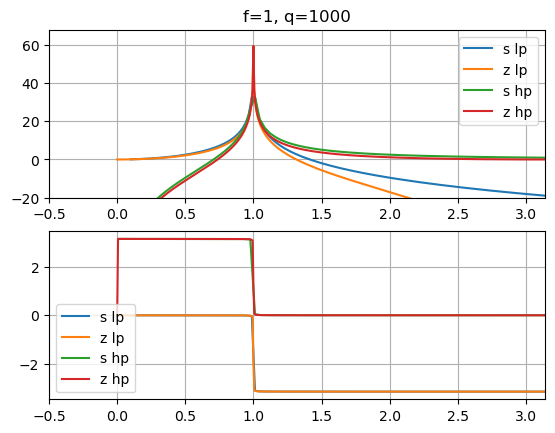

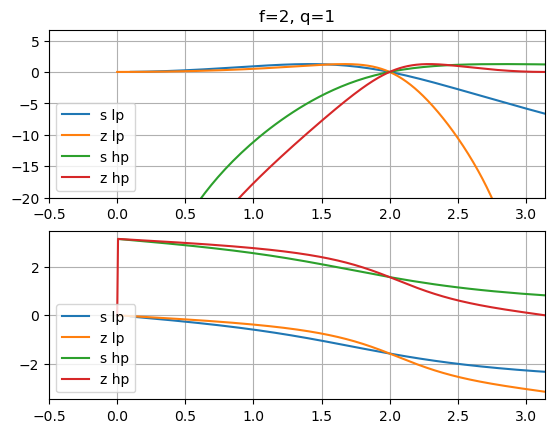

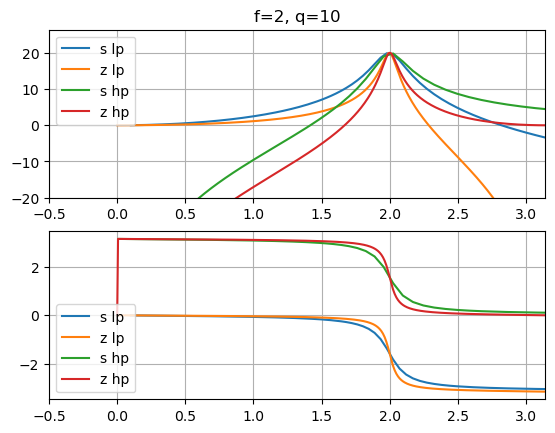

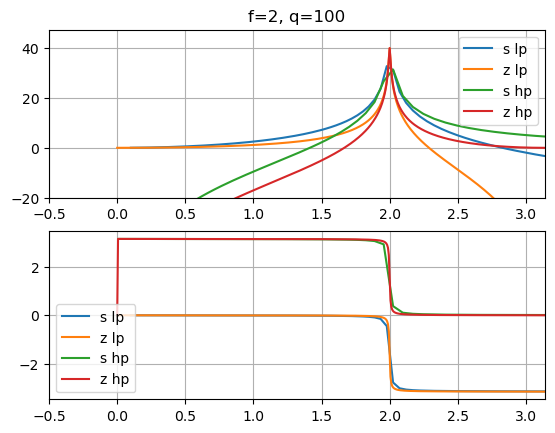

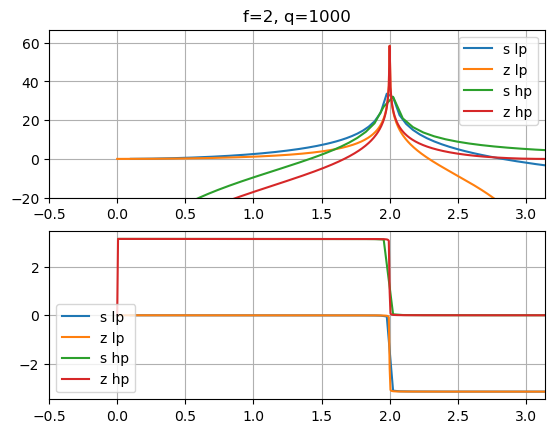

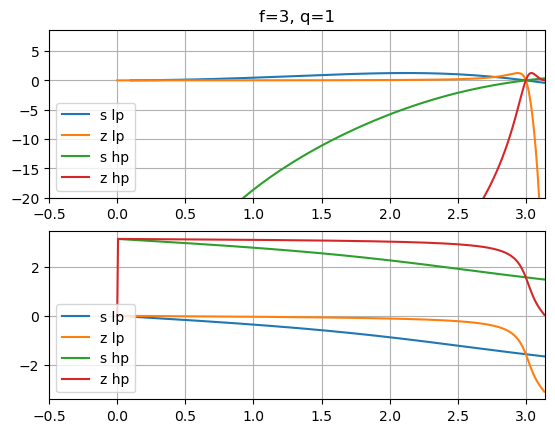

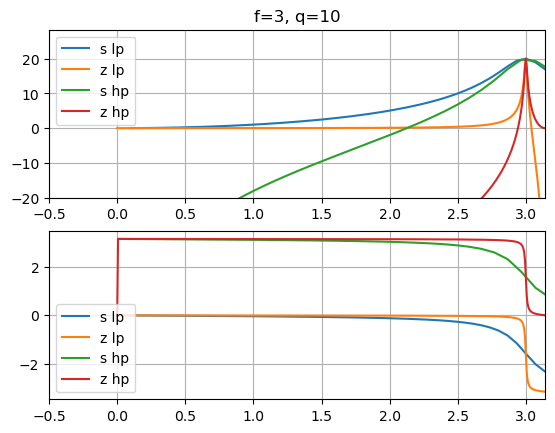

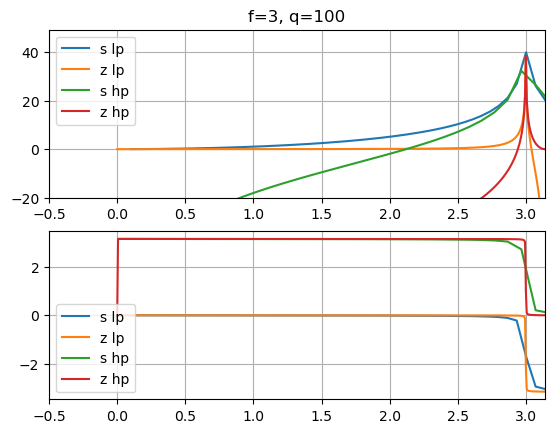

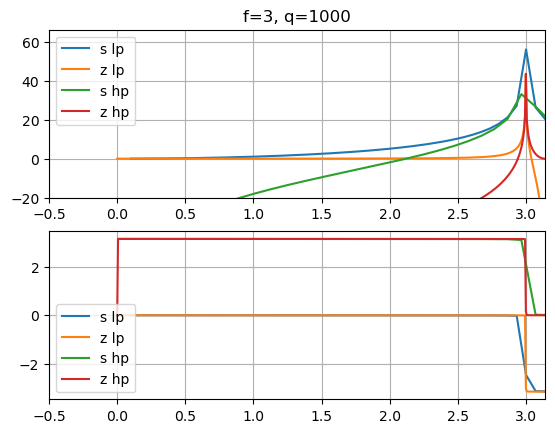

In [367]:
for f in [0.25, 1, 2, 3]:
    for q in [1, 10, 100, 1000]:
        bs, a_s = [f**2], [1, f/q, f**2]
        ws, hs = sig.freqs(bs, a_s)
        bz, az = lowpass_design(f, q)
        wz, hz = sig.freqz(bz, az)

        bshp = [1, 0, 0]
        wshp, hshp = sig.freqs(bshp, a_s)
        bzhp, azhp = highpass_design(f, q)
        wz, hzhp = sig.freqz(bzhp, azhp)

        bsbp = [0, f/q, 0]
        wsbp, hsbp = sig.freqs(bsbp, a_s)
        # bzbp, azbp = highpass_design(f, q)
        # wz, hzbp = sig.freqz(bzbp, azbp)

        bsn = [1, 0, f**2]
        wsn, hsn = sig.freqs(bsn, a_s)
        bzn, azn = highpass_design(f, q)
        wz, hzn = sig.freqz(bzn, azn)


        fig, ax = plt.subplots(2, 1)
        ax[0].plot(ws, cplx2db(hs), label='s lp')
        ax[0].plot(wz, cplx2db(hz), label='z lp')
        ax[1].plot(ws, np.angle(hs), label='s lp')
        ax[1].plot(wz, np.angle(hz), label='z lp')

        ax[0].plot(wshp, cplx2db(hshp), label='s hp')
        ax[0].plot(wz, cplx2db(hzhp), label='z hp')
        ax[1].plot(wshp, np.angle(hshp), label='s hp')
        ax[1].plot(wz, np.angle(hzhp), label='z hp')

        # ax[0].semilogx(wshp, cplx2db(hsbp), label='s bp')
        # ax[0].semilogx(wz, cplx2db(hzbp), label='z bp')
        # # ax[1].semilogx(wshp, np.angle(hsbp), label='s bp')
        # # ax[1].semilogx(wz, np.angle(hzbp), label='z bp')

        # ax[0].semilogx(wshp, cplx2db(hsn), label='s n')
        # ax[0].semilogx(wz, cplx2db(hzn), label='z n')
        # # ax[1].semilogx(wshp, np.angle(hsn), label='s n')
        # # ax[1].semilogx(wz, np.angle(hzn), label='z n')

        ax[0].legend()
        ax[1].legend()
        ax[0].grid(True)
        ax[1].grid(True)
        ax[0].set_title(f'{f=}, {q=}')
        ax[0].set_ylim(-20)
        ax[0].set_xlim(right=np.pi)
        ax[1].set_xlim(right=np.pi)
